In [139]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Data reading

In [4]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Understanding

In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Categorical variables

### Binary Categorical variables

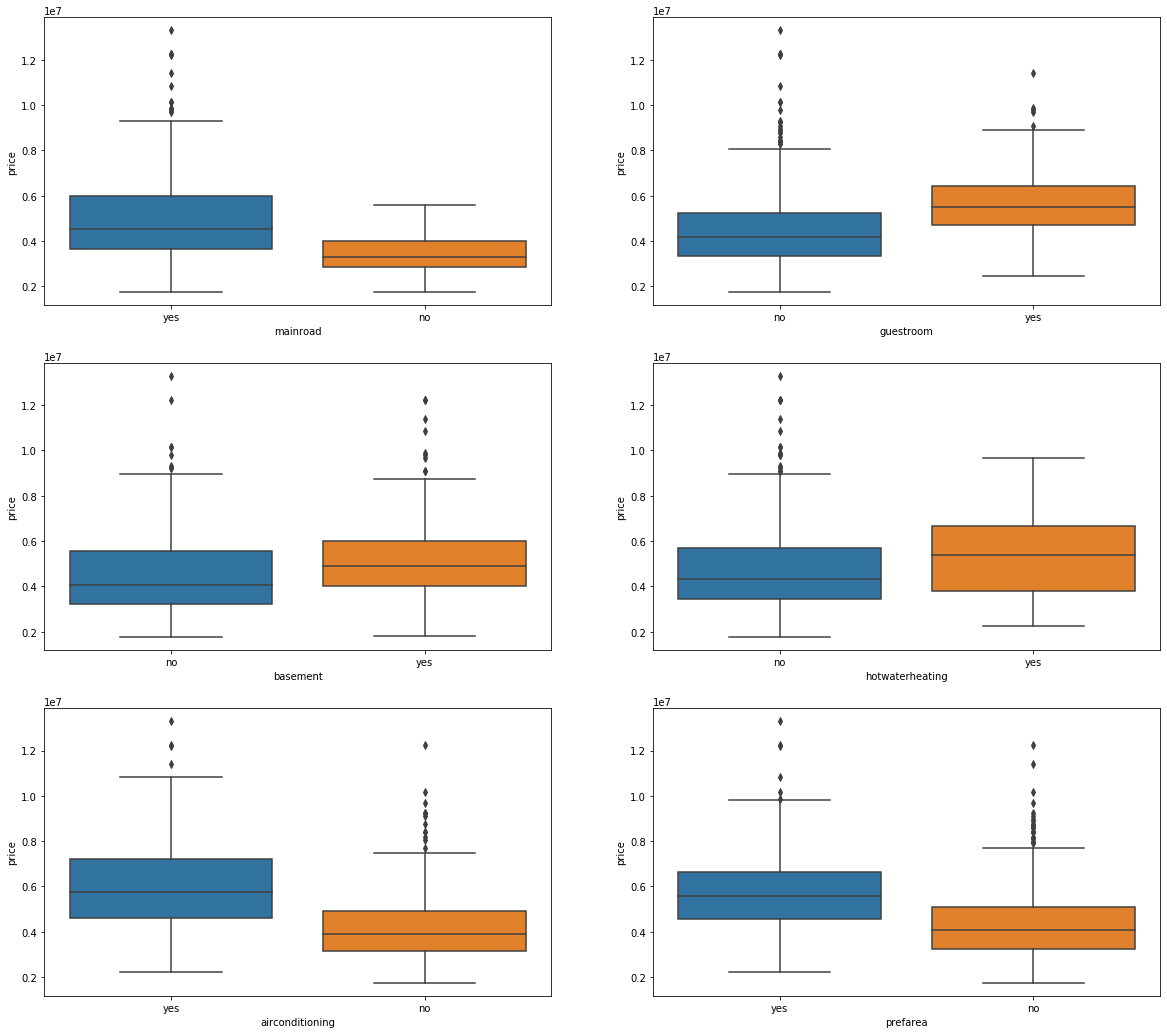

In [8]:
## Use box plots for categorical variables
plt.figure(figsize=(20,18))
plt.subplot(3,2,1)
sns.boxplot(x='mainroad', y='price', data=df)
plt.subplot(3,2,2)
sns.boxplot(x='guestroom', y='price', data=df)
plt.subplot(3,2,3)
sns.boxplot(x='basement', y='price', data=df)
plt.subplot(3,2,4)
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.subplot(3,2,5)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.subplot(3,2,6)
sns.boxplot(x='prefarea', y='price', data=df)
plt.show()

Observe the median values of price increasing/decreasing for different conditions like bathroom, basement, etc

### Multi-valued Categorical variables

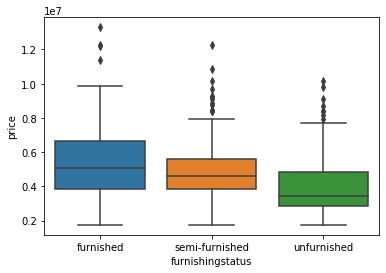

In [9]:
sns.boxplot(x = 'furnishingstatus', y='price', data=df)
plt.show()

### Bivariate Analysis

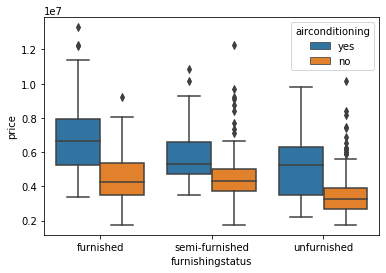

In [10]:
sns.boxplot(x = 'furnishingstatus', y='price', hue='airconditioning', data=df)
plt.show()

## Numeric Variables

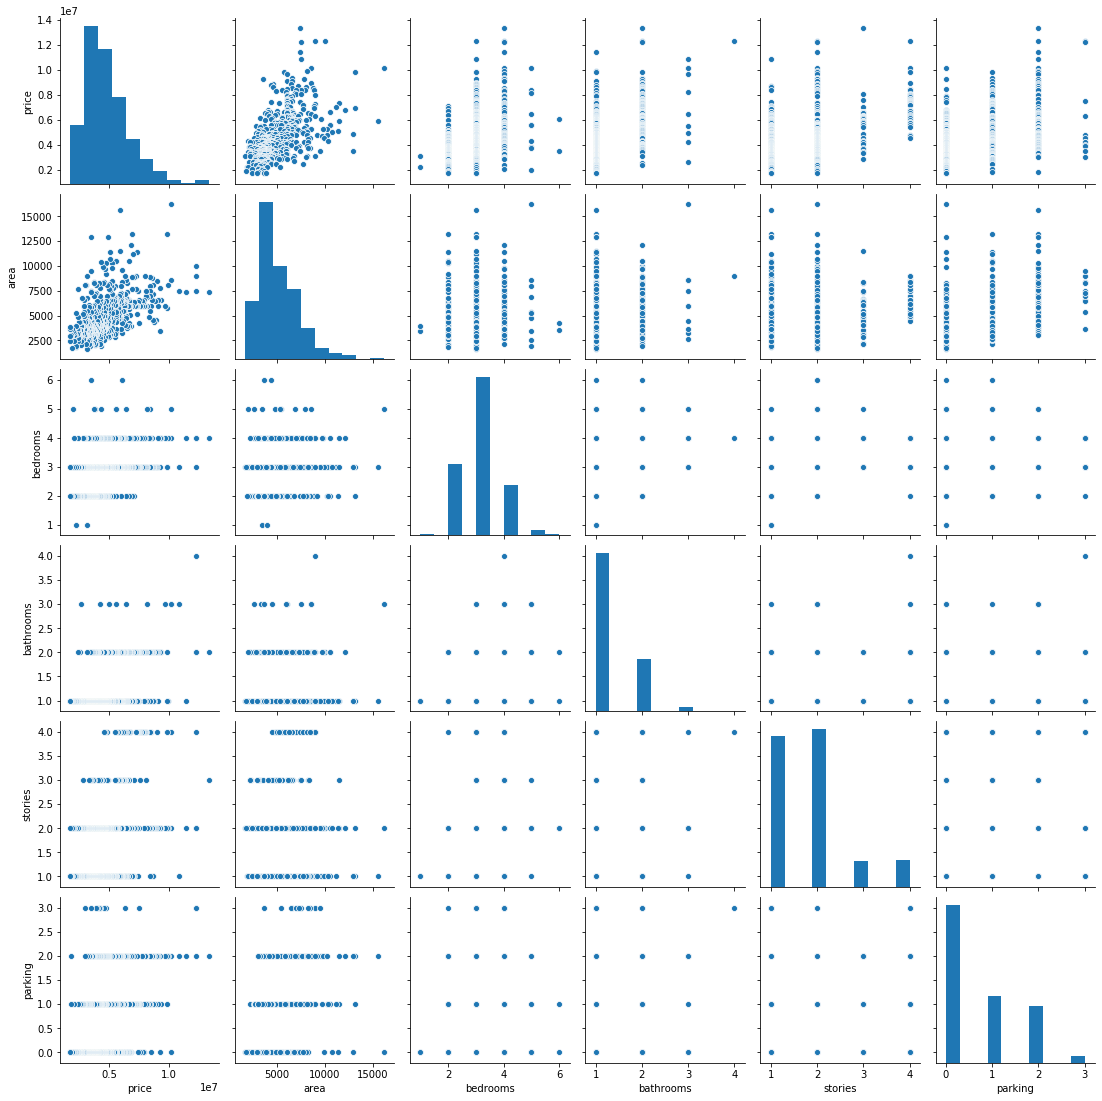

In [11]:
sns.pairplot(df)
plt.show()

# Data Preprocessing

## Categorical variables

Dealing with binary categorical variables

In [12]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [13]:
df['guestroom'] = df.guestroom.apply(lambda x: 1 if x == 'yes' else 0)
varlist = ['mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Dealing with Multi-values categorical variables

In [15]:
status = pd.get_dummies(df.furnishingstatus, drop_first=True)
df_clean = pd.concat([df, status], axis=1)
df_clean = df_clean.drop('furnishingstatus', axis=1)
df_clean.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Train/Test Split

In [105]:
df_train, df_test = train_test_split(df_clean, train_size=0.7, random_state=100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


## MinMax scaling for numeric variables

- Scaling must be always done after Train-Test split
- Scaling is a must in Multi-variate Linear Regression since interpretation will be difficult if each predictor is in different range of values (the coeeficient weights will be misleading in this case in depicting the importance of predicting due to different scales of predictor)
- Scaling is very important in case of optimization algorithms like gradient descent for convergence
- Standardisation is better in many cases since it does not remove the outlier info

Extract Numeric variables and do MinMax scaling

In [106]:
var_list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = MinMaxScaler()
df_train[var_list] = scaler.fit_transform(df_train[var_list])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [107]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Modelling

## Important Predictors for the target variable

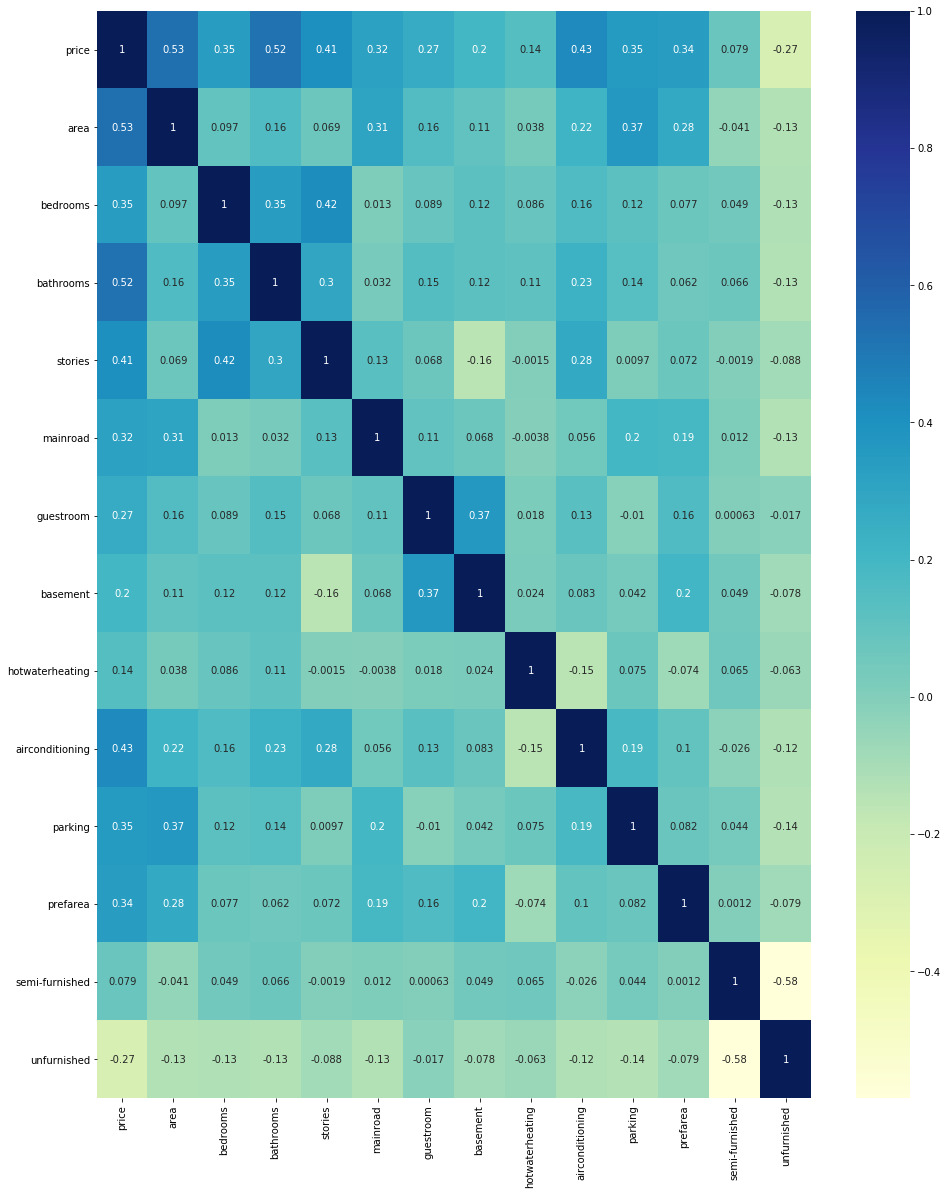

In [108]:
plt.figure(figsize= (16,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Steps to build a good model

- Take all variables and build the model. Then start removing the variables one by one
- Take one variable and build the model. Then start adding variables one by one.

## 1) Area vs Price
- Since area has very high correlation (0.53) with price first consider this for the model

In [109]:
train_data = df_train.copy()

In [110]:
y_train = train_data.pop('price')
X_train = train_data['area']

In order to use statsmodels we need to add '1' column for intercept

In [111]:
X_train.shape

(381,)

In [112]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.shape

(381, 2)

In [113]:
# Create an object of Ordinary Least Squares Class of statsmodel
lr = sm.OLS(y_train, X_train_sm)
# Call fit to train and calculate coefficients
lr_model = lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [114]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           3.15e-29
Time:                        22:22:40   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary of simple Linear Regression with area

- The p-value (probability of H0:coeff insignificant) is very low (< 0.05 level of significance)
- Thus the coefficients are significant (H1, thus rejecting H0)
- R squared is not very good and can be improved(about 28% variance in data has been explained by model)
- F-statistic is about 150
- pvalue of F score is close to zero making the model significant (rejecting H0)

## 2) Area, Bathrooms Vs Price

- The next best variable to consider is bathrooms since they have a correlation of 0.52

In [115]:
X_train = train_data[['area', 'bathrooms']]
X_train_sm = sm.add_constant(X_train)
# Create an object of Ordinary Least Squares Class of statsmodel
lr = sm.OLS(y_train, X_train_sm)
# Call fit to train and calculate coefficients
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.51e-54
Time:                        22:22:47   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary
- Coefficient of Area has changed
- Again P-value shows that the coefficients are significant
- R squared has improved (about 48% variance in data has been explained by model)
- F-statistic has improved
- pvalue of F score is still close to zero making the model significant (rejecting H0)

## 2) Area, Bathrooms, Bedrooms Vs Price

- Lets try bedrooms although it does not have the next highest correlation

In [116]:
X_train = train_data[['area', 'bathrooms', 'bedrooms']]
X_train_sm = sm.add_constant(X_train)
# Create an object of Ordinary Least Squares Class of statsmodel
lr = sm.OLS(y_train, X_train_sm)
# Call fit to train and calculate coefficients
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           3.12e-57
Time:                        22:22:49   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary
- The p-value for constant has gone up (still less than 0.05)
- R squared continues to improve (about 50% variance in data has been explained by model)
- F-statistic has gone down
- pvalue of F score is still close to zero making the model significant (rejecting H0)

## Second method of building model - removing variables from full model

- Build a model with all variables as predictors
- analyse their Statistics like p-value of t-score
- estimate the Variance inflation factor
- remove variables based on 
    - p-values
    - VIF

In [117]:
X_train = train_data
X_train_sm = sm.add_constant(X_train)
# Create an object of Ordinary Least Squares Class of statsmodel
lr = sm.OLS(y_train, X_train_sm)
# Call fit to train and calculate coefficients
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           8.83e-83
Time:                        22:22:55   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif = pd.DataFrame()
vif['Features'] = train_data.columns
vif['VIF'] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


## Scenarios

- High pvalue, High VIF - Drop
- Low pvalue, Low VIF - Keep

We need an iterative method to figure out the following scenarios
- High pvalue, Low VIF
- Low pvalue, High VIF

Approach:

- Remove first High pvalue, Low VIF 
- Recalculate VIF
- Remove High VIF

## 1) bedrooms have High pvalue and High VIF

In [119]:
train_data_new = train_data.drop('bedrooms', axis=1)

In [120]:
X_train = train_data_new
X_train_sm = sm.add_constant(X_train)
# Create an object of Ordinary Least Squares Class of statsmodel
lr = sm.OLS(y_train, X_train_sm)
# Call fit to train and calculate coefficients
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.35e-83
Time:                        22:23:07   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017      2.032      0.043       0.001       0.069
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
vif = pd.DataFrame()
vif['Features'] = train_data_new.columns
vif['VIF'] = [variance_inflation_factor(train_data_new.values, i) for i in range(train_data_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
3,mainroad,5.53
0,area,4.55
2,stories,2.24
8,parking,2.11
10,semi-furnished,1.97
5,basement,1.90
7,airconditioning,1.77
11,unfurnished,1.62
1,bathrooms,1.61
9,prefarea,1.51


## 2) semi-furnished have High pvalue and Low VIF

In [122]:
train_data_new = train_data_new.drop('semi-furnished', axis=1)

In [123]:
X_train = train_data_new
X_train_sm = sm.add_constant(X_train)
# Create an object of Ordinary Least Squares Class of statsmodel
lr = sm.OLS(y_train, X_train_sm)
# Call fit to train and calculate coefficients
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.73e-84
Time:                        22:23:21   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif = pd.DataFrame()
vif['Features'] = train_data_new.columns
vif['VIF'] = [variance_inflation_factor(train_data_new.values, i) for i in range(train_data_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


## Summary

Since the pvalues and VIF are in range we will proceed with this model to do residuals

# Residual Analysis

The residual error must be approximately normal with mean zero

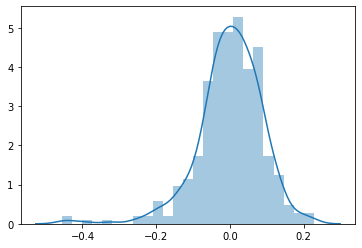

In [125]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train_pred - y_train
sns.distplot(res)
plt.show()

# Predictions on Test set

- While dealing with test data we perform only transform based on scaler we get from train data and not fit or fit_transform
- the implications of only transform can be seen in describe() of test data where values are not in 0-1 range after scaling
- extract x and y variables for test
- Remove all the variables which were dropped from training side input due to pvalue/VIF
- add constant for intercept if statsmodels is used for fitting
- Perform only predictions based on the model we got from training data

In [131]:
test_data = df_test.copy()

In [132]:
var_list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
test_data[var_list] = scaler.transform(test_data[var_list])

In [133]:
test_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### extract x and y for test predictions

In [134]:
y_test = test_data.pop('price')

In [135]:
X_test = test_data.drop(['bedrooms', 'semi-furnished'], axis=1)

In [136]:
X_test_sm = sm.add_constant(X_test)

In [137]:
y_test_pred = lr_model.predict(X_test_sm)

### Find the metric R2 for test set

In [140]:
r2_score(y_test, y_test_pred)

0.6713505684480789

# Interpretation of Predictors

- Note that area has the highest coefficient 0.2347
- Only unfurnished has negative coefficient -0.0323

# Further Improvements

- Add new features like ratios bedrooms/bathrooms, etc based on domain knowledge
- go for non-linear model fitting